# **1. 웹크롤링**

크롤링을 위한 셀레니움 라이브러리와 크롬 드라이버 설치

In [ ]:
!pip install Selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin/

import sys
sys.path.insert(0, '/usr/lib/chromium-browser/chromedriver/usr/bin/')

  Using cached urllib3-1.26.7-py2.py3-none-any.whl (138 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bioni

In [ ]:
import time
import numpy as np
import pandas as pd
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver= webdriver.Chrome('chromedriver', chrome_options = chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


In [ ]:
pd.set_option('display.max_rows', 500)

데이터를 저장할 데이터 프레임 생성

In [ ]:
data = pd.DataFrame(data = [], columns = ['리뷰', '별점'])

웹크롤링할 url로 이동

In [ ]:
url = 'https://play.google.com/store/apps/details?id=com.kakao.talk&hl=ko&gl=US&showAllReviews=true'
driver.get(url)

리뷰가 늘어나도록 스크롤을 내리는 함수 생성

In [ ]:
def scroll_down(driver):
    driver.execute_script("window.scrollTo(0, 999999999999)")
    time.sleep(1)

In [ ]:
driver.get('https://play.google.com/store/apps/details?id=com.kakao.talk&hl=ko&gl=US&showAllReviews=true')

xpath를 활용하여 여러개의 데이터를 수집하는 함수 생성

In [ ]:
def crawling(driver, data, k):
    review = driver.find_elements_by_css_selector('.UD7Dzf')
    star = driver.find_elements_by_xpath('//div[@class="pf5lIe"]/div[@role="img"]')
    
    for i in range(k):
        tmp = []
        tmp.append(review[i].text)
        tmp.append(star[i].get_attribute('aria-label'))

        tmp = pd.DataFrame(data=[tmp], columns=data.columns)
        data = pd.concat([data,tmp])
        
    return data

In [ ]:
scroll_down(driver)

crawling함수를 활용하여 300개의 데이터 수집

In [ ]:
data = crawling(driver, data, 300)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data.reset_index(inplace=True, drop=True)
data.head()

,리뷰,별점
0,너무 좋아요 잘쓰고있어요 근대 제가 폰을 미국국적?으로 바꿔서 그런지 프로필꾸미기 ...,별표 5개 만점에 4.4개를 받았습니다.
1,업데이트후에 문제없이잘되던 카톡이 문제가생겼습니다.. 문자가 가지도 받지도못하게되는...,별표 5개 만점에 3개를 받았습니다.
2,이틀동안 갑자기 메세지 전송이 안됩니다 앱을 지웠다 다시 깔았는데도 똑같아서 회사에...,별표 5개 만점에 3개를 받았습니다.
3,지플립3 쓰는데 갑자기 와이파이없인 발신수신 카카오톡만 다 안되요. 하루지났는데 문...,별표 5개 만점에 5개를 받았습니다.
4,업데이트후 들어오는 수신카톡은 받을수 있는데 제가 쓰는 글은 발신이 안되고있어요 앱...,별표 5개 만점에 1개를 받았습니다.


별점 데이터 전처리 

In [ ]:
data['별점'] = data['별점'].str[10]

In [ ]:
data.head()

,리뷰,별점
0,너무 좋아요 잘쓰고있어요 근대 제가 폰을 미국국적?으로 바꿔서 그런지 프로필꾸미기 ...,4
1,업데이트후에 문제없이잘되던 카톡이 문제가생겼습니다.. 문자가 가지도 받지도못하게되는...,3
2,이틀동안 갑자기 메세지 전송이 안됩니다 앱을 지웠다 다시 깔았는데도 똑같아서 회사에...,3
3,지플립3 쓰는데 갑자기 와이파이없인 발신수신 카카오톡만 다 안되요. 하루지났는데 문...,5
4,업데이트후 들어오는 수신카톡은 받을수 있는데 제가 쓰는 글은 발신이 안되고있어요 앱...,1


# **2. 텍스트 데이터 전처리**

긍정, 부정 나누기

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰      300 non-null    object
 1   별점      300 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [ ]:
data['별점'] = data['별점'].astype(int)
data.dtypes

리뷰    object
별점     int64
dtype: object

In [ ]:
print(data['별점'].value_counts())

1    121
4     57
3     56
5     50
2     16
Name: 별점, dtype: int64


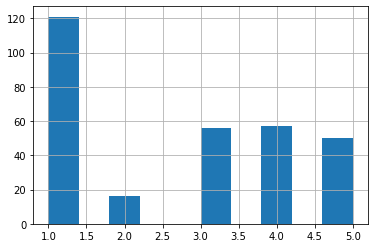

In [ ]:
data['별점'].hist()

1-2점 : 부정(0), 3-5점 : 긍정(1)

In [ ]:
def star_to_label(별점) :
    if 별점 > 3 :
        return 1
    else :
        return 0
data['y'] = data['별점'].apply(lambda x : star_to_label(x))

In [ ]:
data['y'].value_counts()

0    193
1    107
Name: y, dtype: int64

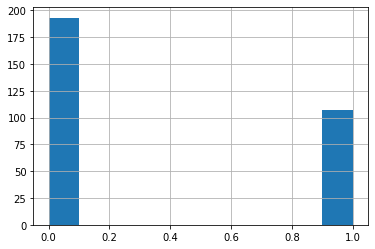

In [ ]:
data['y'].hist()

In [ ]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.1.0 requires urllib3[secure]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ hash mecab
+ echo 'mecab-ko is

특수문자 및 숫자 제거

In [ ]:
data['리뷰'] = data['리뷰'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [ ]:
data.head()

,리뷰,별점,y
0,너무 좋아요 잘쓰고있어요 근대 제가 폰을 미국국적으로 바꿔서 그런지 프로필꾸미기 할...,4,1
1,업데이트후에 문제없이잘되던 카톡이 문제가생겼습니다 문자가 가지도 받지도못하게되는 아...,3,0
2,이틀동안 갑자기 메세지 전송이 안됩니다 앱을 지웠다 다시 깔았는데도 똑같아서 회사에...,3,0
3,지플립 쓰는데 갑자기 와이파이없인 발신수신 카카오톡만 다 안되요 하루지났는데 문의도...,5,1
4,업데이트후 들어오는 수신카톡은 받을수 있는데 제가 쓰는 글은 발신이 안되고있어요 앱...,1,0


불용어 제거

100개의 불용어가 저장된 텍스트 파일 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
stopwords = pd.read_csv('/content/drive/MyDrive/감성공학/한국어불용어100.txt', sep = '\t').values.tolist()

In [ ]:
stopwords=[x[0]  for x in stopwords]

In [ ]:
print(stopwords)

['있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내', '내', '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들', '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓']


불용어 추가

In [ ]:
kkaotalk_stopwords = ['카카오톡', '카톡', '거', '게', '제']
for word in kkaotalk_stopwords :
    stopwords.append(word)
print(stopwords)

['있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내', '내', '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들', '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '카카오톡', '카톡', '거', '게', '제']


명사만 추출하여 토큰화

In [ ]:
import konlpy

tag = konlpy.tag.Mecab()

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
tokens = []
corpus = []

for i, sentence in enumerate(data['리뷰']) :
    noun = tag.nouns(sentence)
    noun = [x for x in noun if x not in stopwords]
    tokens.append(noun)
    corpus.append(' '.join(noun))

In [ ]:
print(tokens)
print(corpus)

[['폰', '미국', '국적', '프로필', '왼쪽', '밑', '음표', '이게', '노래', '오픈', '채팅', '거기', '프로필', '근대', '해외', '포', '스팃'], ['업데이트', '후', '문자', '이상', '시', '시', '상대방', '톡', '이게'], ['이틀', '동안', '메세지', '전송', '앱', '회사', '멜', '해결', '평점', '해결', '운', '영진', '감사'], ['플립', '와이파이', '발신', '수신', '하루', '문의', '연락', '불편'], ['업데이트', '후', '수신', '글', '발신', '앱'], ['최신', '버', '젼', '업데이트', '메세지', '전송', '짜증', '날', '허접'], ['미국', '동부', '아침', '와이파이', '연결', '사용', '가능', '티', '모빌', '사용', '뿐', '부모', '토요일', '주변', '티', '모빌', '사용', '고생', '해결'], ['사용', '부분', '이모티콘', '이모티콘', '다운로드', '배경', '화면', '무료', '게임', '친구', '통신', '통신', '게임', '사용', '부분', '사용'], ['안녕', '사용', '이모티콘', '프로필', '사진', '동영상', '친구', '선물', '채팅', '장', '배경', '톡', '방', '모두', '대화', '쉼'], ['게임', '유튜브', '팝업', '상단', '화면', '방해', '팝업', '위치', '가운데', '선택지', '상단', '가운데', '주변', '화면', '터치', '가로', '게임', '옆', '와이프', '불상사', '화', '나중', '짜증'], ['편리', '선물', '랑', '이모티콘', '채널', '요즘', '그거', '차단', '차단', '채널', '이것', '완벽', '부탁'], ['버전', '온라인', '로그아웃', '기능', '추가', '재설', '대화', '백업', '작동', '백업', '대화', '내용',

긍정과 부정에 따른 토큰 분리

In [ ]:
tokens_p, tokens_n = [], []
for i, token in enumerate(tokens) :
    if data['y'].values[i] == 1:
        tokens_p.append(token)
    else :
        tokens_n.append(token)

긍정 토큰

In [ ]:
print(tokens_p)

[['폰', '미국', '국적', '프로필', '왼쪽', '밑', '음표', '이게', '노래', '오픈', '채팅', '거기', '프로필', '근대', '해외', '포', '스팃'], ['플립', '와이파이', '발신', '수신', '하루', '문의', '연락', '불편'], ['안녕', '사용', '이모티콘', '프로필', '사진', '동영상', '친구', '선물', '채팅', '장', '배경', '톡', '방', '모두', '대화', '쉼'], ['게임', '유튜브', '팝업', '상단', '화면', '방해', '팝업', '위치', '가운데', '선택지', '상단', '가운데', '주변', '화면', '터치', '가로', '게임', '옆', '와이프', '불상사', '화', '나중', '짜증'], ['버전', '온라인', '로그아웃', '기능', '추가', '재설', '대화', '백업', '작동', '백업', '대화', '내용', '백업', '의미'], ['앱', '이모티콘', '문자', '문자', '앱', '강추'], ['이거', '네트워크', '곳', '스톡', '이거', '오류'], ['업데이트', '상단', '바', '자동', '답변', '기능', '추가', '표시', '이상', '답장', '반', '톡', '방', '표시', '선생', '상황', '답장', '기능', '필요', '가능'], ['갤럭시', '워치', '플', '워치', '플', '렉', '플', '이전', '대화', '내용', '플', '이전', '내용', '업데이트', '워치', '플', '삭제', '삭제', '세상'], ['멀티', '프로필', '친구', '추가', '상대방', '친구', '추가', '친구', '톡', '방', '멀티', '프로필', '이용', '멀티', '프로필', '필요', '곳', '친구', '추가', '타자', '톡', '방', '텐데', '저', '프로필', '부분', '개선', '요청'], ['인증', '브', '연동', '인증서', '발급', '손님

부정 토큰

In [ ]:
print(tokens_n)

[['업데이트', '후', '문자', '이상', '시', '시', '상대방', '톡', '이게'], ['이틀', '동안', '메세지', '전송', '앱', '회사', '멜', '해결', '평점', '해결', '운', '영진', '감사'], ['업데이트', '후', '수신', '글', '발신', '앱'], ['최신', '버', '젼', '업데이트', '메세지', '전송', '짜증', '날', '허접'], ['미국', '동부', '아침', '와이파이', '연결', '사용', '가능', '티', '모빌', '사용', '뿐', '부모', '토요일', '주변', '티', '모빌', '사용', '고생', '해결'], ['사용', '부분', '이모티콘', '이모티콘', '다운로드', '배경', '화면', '무료', '게임', '친구', '통신', '통신', '게임', '사용', '부분', '사용'], ['편리', '선물', '랑', '이모티콘', '채널', '요즘', '그거', '차단', '차단', '채널', '이것', '완벽', '부탁'], ['채팅', '로그', '데이터', '삭제', '삭제', '휴대폰', '대화', '도중', '친구', '창', '채팅', '창', '로그', '채팅', '창', '이게', '답변'], ['저기', '폰', '폰', '로그인', '비밀', '번호', '보호', '조치', '비밀', '번호', '설정', '설정', '저녁', '분', '아침', '보호', '조치', '건', '뭐', '외국', '중요'], ['친구', '대화', '가족', '대화', '가능', '프로필', '오픈', '채팅', '방', '테마', '선물', '캡처', '사진', '가능', '이모티콘'], ['오류', '실수', '삭제', '계정', '전화', '번호', '등록', '로그인', '그거', '계정', '리뷰', '답장'], ['프로필', '설정', '디데이', '공유', '밖', '점이', '요개', '요번', '멀티', '프로필', '지갑', '가입', '

In [ ]:
corpus_p, corpus_n = [], []
for token in tokens_p :
    corpus_p.append(' '.join(token))
for token in tokens_n :
    corpus_n.append(' '.join(token))

In [ ]:
print(corpus_p)
print(corpus_n)

['폰 미국 국적 프로필 왼쪽 밑 음표 이게 노래 오픈 채팅 거기 프로필 근대 해외 포 스팃', '플립 와이파이 발신 수신 하루 문의 연락 불편', '안녕 사용 이모티콘 프로필 사진 동영상 친구 선물 채팅 장 배경 톡 방 모두 대화 쉼', '게임 유튜브 팝업 상단 화면 방해 팝업 위치 가운데 선택지 상단 가운데 주변 화면 터치 가로 게임 옆 와이프 불상사 화 나중 짜증', '버전 온라인 로그아웃 기능 추가 재설 대화 백업 작동 백업 대화 내용 백업 의미', '앱 이모티콘 문자 문자 앱 강추', '이거 네트워크 곳 스톡 이거 오류', '업데이트 상단 바 자동 답변 기능 추가 표시 이상 답장 반 톡 방 표시 선생 상황 답장 기능 필요 가능', '갤럭시 워치 플 워치 플 렉 플 이전 대화 내용 플 이전 내용 업데이트 워치 플 삭제 삭제 세상', '멀티 프로필 친구 추가 상대방 친구 추가 친구 톡 방 멀티 프로필 이용 멀티 프로필 필요 곳 친구 추가 타자 톡 방 텐데 저 프로필 부분 개선 요청', '인증 브 연동 인증서 발급 손님 안내 어르신 계좌 번호 입력 성질 인증서 브 연동 수정 바람', '공지 저장 위치 경로 변경 건 경 안드로이드 기준 파일 액세스 호환 포기 겁니까 사진 영상 전송 앱 겁니까 업무 무시', '계정 신고 계정 동안 사용 톡 문의 탈퇴 시 가입 탈퇴 결심 탈퇴 후 뒤 가입 탈퇴 후 가입 카카오 페이 돈 구매 이모티콘 친구 이모티콘 친구 선물 기프 티 콘 해결 바람', '사용자 계정 코드 사용 가능 웹 사이트 계정 도 계정 사용자 사용 이전 외', '덕분 삶 핸드폰 번호 추가 친구 자동 추가 기능 핸드폰 번호 삭제 친구 삭제 기능 선택 가능 현재 목록 친구 차단 차단 풀기 친구 추가 안함', '업데이트 파일 다운 폰 파일 앱 문서 문서 다운로드 파일 어디 위 스크롤 파일 불편 메일 네이버 오류 불편 참고 갤럭시 유저 업데이트 건 워', '단계 성장 기능 제안 서로 친구 추가 관계 단체 개인 기능 개인 사용자 비지 니즈 사용 면 유용 친구 목록 그룹

In [ ]:
corpus_p1 = ' '.join(corpus_p).split()
corpus_n1 = ' '.join(corpus_n).split()
print(corpus_p1)
print(corpus_n1)

['폰', '미국', '국적', '프로필', '왼쪽', '밑', '음표', '이게', '노래', '오픈', '채팅', '거기', '프로필', '근대', '해외', '포', '스팃', '플립', '와이파이', '발신', '수신', '하루', '문의', '연락', '불편', '안녕', '사용', '이모티콘', '프로필', '사진', '동영상', '친구', '선물', '채팅', '장', '배경', '톡', '방', '모두', '대화', '쉼', '게임', '유튜브', '팝업', '상단', '화면', '방해', '팝업', '위치', '가운데', '선택지', '상단', '가운데', '주변', '화면', '터치', '가로', '게임', '옆', '와이프', '불상사', '화', '나중', '짜증', '버전', '온라인', '로그아웃', '기능', '추가', '재설', '대화', '백업', '작동', '백업', '대화', '내용', '백업', '의미', '앱', '이모티콘', '문자', '문자', '앱', '강추', '이거', '네트워크', '곳', '스톡', '이거', '오류', '업데이트', '상단', '바', '자동', '답변', '기능', '추가', '표시', '이상', '답장', '반', '톡', '방', '표시', '선생', '상황', '답장', '기능', '필요', '가능', '갤럭시', '워치', '플', '워치', '플', '렉', '플', '이전', '대화', '내용', '플', '이전', '내용', '업데이트', '워치', '플', '삭제', '삭제', '세상', '멀티', '프로필', '친구', '추가', '상대방', '친구', '추가', '친구', '톡', '방', '멀티', '프로필', '이용', '멀티', '프로필', '필요', '곳', '친구', '추가', '타자', '톡', '방', '텐데', '저', '프로필', '부분', '개선', '요청', '인증', '브', '연동', '인증서', '발급', '손님', '안내', '어르신', '계좌',

긍정과 부정 토큰 빈도수

In [ ]:
from collections import Counter
counter_p = Counter(corpus_p1)
counter_n = Counter(corpus_n1)

In [ ]:
print(counter_p.most_common(100))
print(counter_n.most_common(100))

[('사용', 42), ('친구', 34), ('방', 31), ('기능', 30), ('톡', 27), ('프로필', 26), ('추가', 24), ('워치', 22), ('앱', 20), ('채팅', 19), ('불편', 19), ('삭제', 19), ('사진', 17), ('업데이트', 17), ('상대방', 17), ('설정', 16), ('폰', 15), ('플', 14), ('계정', 14), ('오픈', 13), ('대화', 13), ('오류', 13), ('자동', 13), ('파일', 13), ('사양', 12), ('스마트폰', 12), ('음성', 12), ('이모티콘', 11), ('가능', 11), ('차단', 11), ('상단', 10), ('번호', 9), ('건', 9), ('겁니까', 9), ('카카오', 9), ('버그', 9), ('분', 9), ('동영상', 8), ('버전', 8), ('답장', 8), ('필요', 8), ('저', 8), ('개선', 8), ('연동', 8), ('영상', 8), ('무시', 8), ('탈퇴', 8), ('코드', 8), ('비지니스', 8), ('문의', 7), ('선물', 7), ('내용', 7), ('이거', 7), ('스톡', 7), ('갤럭시', 7), ('이전', 7), ('해결', 7), ('백업', 6), ('곳', 6), ('표시', 6), ('멀티', 6), ('인증서', 6), ('수정', 6), ('시', 6), ('가입', 6), ('후', 6), ('사용자', 6), ('핸드폰', 6), ('목록', 6), ('다운로드', 6), ('걸', 6), ('안녕', 5), ('팝업', 5), ('위치', 5), ('주변', 5), ('인증', 5), ('개인', 5), ('그룹', 5), ('공유', 5), ('속도', 5), ('로그인', 5), ('무음', 5), ('목소리', 5), ('부탁', 5), ('기종', 5), ('이게', 4), ('수신', 4), ('

# **3. 긍정과 부정에 대한 워드 크라우딩 결과를 비교 분석 후 wordcloud 라이브러리로 시각화**

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc 

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font = font_manager.FontProperties(fname = path).get_name()
rc('font', family = font)

In [ ]:
font_manager._rebuild()

긍정 평가에 따른 명사 리스트

In [ ]:
pos_noun_list = counter_p.most_common(100)
for i in pos_noun_list :
    print(i)

('사용', 42)
('친구', 34)
('방', 31)
('기능', 30)
('톡', 27)
('프로필', 26)
('추가', 24)
('워치', 22)
('앱', 20)
('채팅', 19)
('불편', 19)
('삭제', 19)
('사진', 17)
('업데이트', 17)
('상대방', 17)
('설정', 16)
('폰', 15)
('플', 14)
('계정', 14)
('오픈', 13)
('대화', 13)
('오류', 13)
('자동', 13)
('파일', 13)
('사양', 12)
('스마트폰', 12)
('음성', 12)
('이모티콘', 11)
('가능', 11)
('차단', 11)
('상단', 10)
('번호', 9)
('건', 9)
('겁니까', 9)
('카카오', 9)
('버그', 9)
('분', 9)
('동영상', 8)
('버전', 8)
('답장', 8)
('필요', 8)
('저', 8)
('개선', 8)
('연동', 8)
('영상', 8)
('무시', 8)
('탈퇴', 8)
('코드', 8)
('비지니스', 8)
('문의', 7)
('선물', 7)
('내용', 7)
('이거', 7)
('스톡', 7)
('갤럭시', 7)
('이전', 7)
('해결', 7)
('백업', 6)
('곳', 6)
('표시', 6)
('멀티', 6)
('인증서', 6)
('수정', 6)
('시', 6)
('가입', 6)
('후', 6)
('사용자', 6)
('핸드폰', 6)
('목록', 6)
('다운로드', 6)
('걸', 6)
('안녕', 5)
('팝업', 5)
('위치', 5)
('주변', 5)
('인증', 5)
('개인', 5)
('그룹', 5)
('공유', 5)
('속도', 5)
('로그인', 5)
('무음', 5)
('목소리', 5)
('부탁', 5)
('기종', 5)
('이게', 4)
('수신', 4)
('게임', 4)
('화면', 4)
('가운데', 4)
('작동', 4)
('문자', 4)
('이상', 4)
('이용', 4)
('브', 4)
('바람', 4)


부정 평가에 따른 명사 리스트

In [ ]:
neg_noun_list = counter_n.most_common(100)
for i in neg_noun_list :
    print(i)

('채팅', 66)
('기능', 59)
('사용', 44)
('이모티콘', 42)
('삭제', 41)
('업데이트', 37)
('친구', 35)
('톡', 34)
('방', 33)
('앱', 31)
('폰', 30)
('오픈', 28)
('설정', 25)
('프로필', 25)
('번호', 24)
('이상', 22)
('대화', 22)
('인증', 22)
('글', 20)
('후', 19)
('불편', 19)
('추천', 19)
('창', 18)
('계정', 18)
('정지', 18)
('로그인', 17)
('저장', 17)
('검색', 17)
('오류', 16)
('전화', 16)
('리뷰', 16)
('신고', 15)
('광고', 15)
('감사', 14)
('짜증', 14)
('가능', 14)
('사진', 14)
('스톡', 14)
('파일', 14)
('상대방', 13)
('다운로드', 13)
('플', 13)
('확인', 13)
('이번', 13)
('이후', 13)
('부분', 12)
('화면', 12)
('건', 12)
('내용', 12)
('메세지', 11)
('해결', 11)
('연결', 11)
('부탁', 11)
('답변', 11)
('문의', 11)
('데이터', 10)
('멀티', 10)
('추가', 10)
('자체', 10)
('지인', 10)
('마음', 10)
('워치', 10)
('이게', 9)
('전송', 9)
('그거', 9)
('분', 9)
('답장', 9)
('저', 9)
('이유', 9)
('버그', 9)
('개선', 9)
('다운', 9)
('자동', 9)
('시', 8)
('동안', 8)
('선물', 8)
('차단', 8)
('이것', 8)
('가입', 8)
('페이스', 8)
('음성', 8)
('전체', 8)
('정보', 8)
('영상', 8)
('기록', 8)
('공간', 8)
('카카오', 8)
('기본', 8)
('뷰', 8)
('위', 7)
('줄', 7)
('실행', 7)
('음악', 7)
('이용', 7)


워드 클라우드

In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(font_path = path,
               background_color = "white", width = 1000, height = 1000,
               max_words = 100, max_font_size = 300)

긍정 워드클라우드

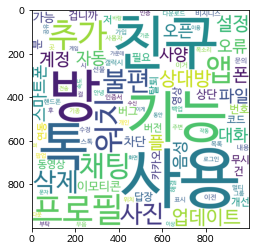

In [ ]:
wc.generate_from_frequencies(dict(pos_noun_list))
plt.imshow(wc)

부정 워드 클라우드

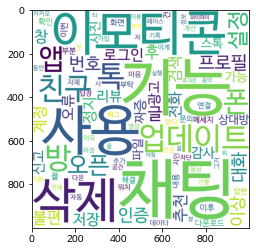

In [ ]:
wc.generate_from_frequencies(dict(neg_noun_list))
plt.imshow(wc)

긍정과 부정 키워드 비교

긍정

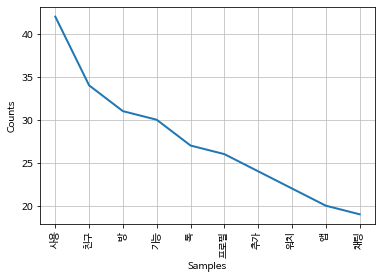

In [ ]:
import nltk
import matplotlib.pyplot as plt
positive = nltk.Text(corpus_p1)
plt.rc('font', family = font)

positive.plot(10)
plt.show()

부정

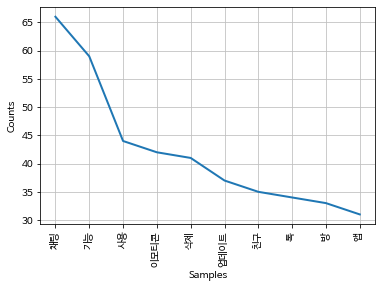

In [ ]:
negative = nltk.Text(corpus_n1)
plt.rc('font', family = font)

negative.plot(10)
plt.show()

긍정

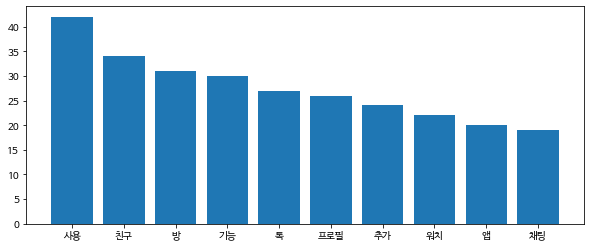

In [ ]:
top_10 = counter_p.most_common(10)

plt.figure(figsize = (10, 4))
plt.rc('font', family = font)
plt.bar(range(len(top_10)), [val[1] for val in top_10])
plt.xticks(range(len(top_10)), [val[0] for val in top_10])
plt.show()

부정

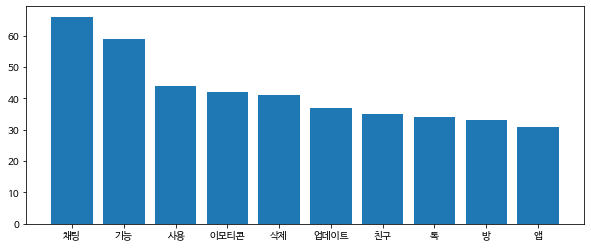

In [ ]:
top_10 = counter_n.most_common(10)

plt.figure(figsize = (10, 4))
plt.rc('font', family = font)
plt.bar(range(len(top_10)), [val[1] for val in top_10])
plt.xticks(range(len(top_10)), [val[0] for val in top_10])
plt.show()

DTM(문서 단어 행렬)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import gensim
g_dictionary = gensim.corpora.Dictionary(tokens)
g_corpus = [g_dictionary.doc2bow(text) for text in tokens]
vector = CountVectorizer(vocabulary=g_dictionary.token2id)
dtm = vector.fit_transform(corpus).toarray()

col = g_dictionary.token2id.keys()
print(dtm.shape)
pd.DataFrame(dtm, columns=col)

(300, 912)


,거기,국적,근대,노래,미국,밑,스팃,오픈,왼쪽,음표,이게,채팅,포,폰,프로필,해외,문자,상대방,시,업데이트,이상,톡,후,감사,동안,메세지,멜,앱,영진,운,이틀,전송,평점,해결,회사,문의,발신,불편,수신,연락,...,자판,전용,주세요,체크인,크로,타일,어제,뭔지,별점,저번,반영,소비자,원활,적극,정체,곤혹,보통,규규,당황,시분,해결책,급속도,긴급,무한,쓰,애플리케이션,예상,인지,틀,선태,더락,패드,일괄,결국,마지막,근래,무언가,일전,하루치,산거
0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,1,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


TF-IDF 변환

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vectorizer = TfidfTransformer()
tf_idf = tfidf_vectorizer.fit_transform(dtm).toarray()
col = g_dictionary.token2id.keys()
print(tf_idf.shape)
pd.DataFrame(tf_idf, columns=col)

(300, 912)


,거기,국적,근대,노래,미국,밑,스팃,오픈,왼쪽,음표,이게,채팅,포,폰,프로필,해외,문자,상대방,시,업데이트,이상,톡,후,감사,동안,메세지,멜,앱,영진,운,이틀,전송,평점,해결,회사,문의,발신,불편,수신,연락,...,자판,전용,주세요,체크인,크로,타일,어제,뭔지,별점,저번,반영,소비자,원활,적극,정체,곤혹,보통,규규,당황,시분,해결책,급속도,긴급,무한,쓰,애플리케이션,예상,인지,틀,선태,더락,패드,일괄,결국,마지막,근래,무언가,일전,하루치,산거
0,0.262956,0.300037,0.300037,0.300037,0.272709,0.0,0.300037,0.165636,0.300037,0.300037,0.217628,0.145411,0.0,0.0,0.361093,0.300037,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.474156,0.000000,0.0,0.0,0.000000,0.000000,0.554947,0.432584,0.0,0.332996,0.411333,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.256445,0.276334,0.260869,0.0,0.0,0.359652,0.0,0.326895,0.265622,0.359652,0.496838,0.326895,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.280601,0.380159,0.230899,0.355067,0.418254,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.379021,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.676287,0.000000,0.631648,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.258724,0.000000,0.0,0.0,0.000000,0.000000,0.368400,0.0,0.0,0.000000,0.0,0.000000,0.375111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [ ]:
print(vector.vocabulary_)
id_to_word = {v: k for k, v in vector.vocabulary_.items()}
print(id_to_word)

{'거기': 0, '국적': 1, '근대': 2, '노래': 3, '미국': 4, '밑': 5, '스팃': 6, '오픈': 7, '왼쪽': 8, '음표': 9, '이게': 10, '채팅': 11, '포': 12, '폰': 13, '프로필': 14, '해외': 15, '문자': 16, '상대방': 17, '시': 18, '업데이트': 19, '이상': 20, '톡': 21, '후': 22, '감사': 23, '동안': 24, '메세지': 25, '멜': 26, '앱': 27, '영진': 28, '운': 29, '이틀': 30, '전송': 31, '평점': 32, '해결': 33, '회사': 34, '문의': 35, '발신': 36, '불편': 37, '수신': 38, '연락': 39, '와이파이': 40, '플립': 41, '하루': 42, '글': 43, '날': 44, '버': 45, '젼': 46, '짜증': 47, '최신': 48, '허접': 49, '가능': 50, '고생': 51, '동부': 52, '모빌': 53, '부모': 54, '뿐': 55, '사용': 56, '아침': 57, '연결': 58, '주변': 59, '토요일': 60, '티': 61, '게임': 62, '다운로드': 63, '무료': 64, '배경': 65, '부분': 66, '이모티콘': 67, '친구': 68, '통신': 69, '화면': 70, '대화': 71, '동영상': 72, '모두': 73, '방': 74, '사진': 75, '선물': 76, '쉼': 77, '안녕': 78, '장': 79, '가로': 80, '가운데': 81, '나중': 82, '방해': 83, '불상사': 84, '상단': 85, '선택지': 86, '옆': 87, '와이프': 88, '위치': 89, '유튜브': 90, '터치': 91, '팝업': 92, '화': 93, '그거': 94, '랑': 95, '부탁': 96, '완벽': 97, '요즘': 98, '이것': 99, '차단': 100, '

# **4. 로지스틱 회귀분석**

In [ ]:
data.head()

,리뷰,별점,y
0,너무 좋아요 잘쓰고있어요 근대 제가 폰을 미국국적으로 바꿔서 그런지 프로필꾸미기 할...,4,1
1,업데이트후에 문제없이잘되던 카톡이 문제가생겼습니다 문자가 가지도 받지도못하게되는 아...,3,0
2,이틀동안 갑자기 메세지 전송이 안됩니다 앱을 지웠다 다시 깔았는데도 똑같아서 회사에...,3,0
3,지플립 쓰는데 갑자기 와이파이없인 발신수신 카카오톡만 다 안되요 하루지났는데 문의도...,5,1
4,업데이트후 들어오는 수신카톡은 받을수 있는데 제가 쓰는 글은 발신이 안되고있어요 앱...,1,0


In [ ]:
data['y'].value_counts()

0    193
1    107
Name: y, dtype: int64

데이터 형성

In [ ]:
X = tf_idf
y = data['y']
df = pd.concat([y, pd.DataFrame(X)], axis = 1)
df.head()

,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911
0,1,0.262956,0.300037,0.300037,0.300037,0.272709,0.0,0.300037,0.165636,0.300037,0.300037,0.217628,0.145411,0.0,0.0,0.361093,0.300037,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.474156,0.000000,0.0,0.0,0.000000,0.000000,0.554947,0.432584,0.0,0.332996,0.411333,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.256445,0.276334,0.260869,0.0,0.0,0.359652,0.0,0.326895,0.265622,0.359652,0.496838,0.326895,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.280601,0.380159,0.230899,0.355067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.379021,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.676287,0.000000,0.631648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


훈련용, 평가용 데이터 분할
test_size = 0.3, random_state = 10

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size = 0.3, random_state = 10)
train_data.head()

,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911
235,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.711693,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
290,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.34081,0.34081,0.34081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_train = train_data.drop(['y'], axis = 1)
y_train = train_data['y']
x_test = test_data.drop(['y'], axis = 1)
y_test = test_data['y']

언더 샘플링을 하지 않은 모델

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
reg = LogisticRegression()
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)
acc1 = round(accuracy_score(y_pred, y_test) * 100, 2)
recall1 = round(recall_score(y_pred, y_test) * 100, 2)
prec1 = round(precision_score(y_pred, y_test) * 100, 2)
f1 = round(f1_score(y_pred, y_test) * 100, 2)

print(acc1)
print(recall1)
print(prec1)
print(f1)

77.94
100.0
58.33
73.68


언더 샘플링(NearMiss)

In [ ]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss()

In [ ]:
x_train, y_train = nr.fit_resample(x_train, y_train)

In [ ]:
x_test, y_test = nr.fit_resample(x_test, y_test)

언더 샘플링 모델

In [ ]:
reg2 = LogisticRegression()
reg2.fit(x_train, y_train)

y_pred = reg.predict(x_test)
acc2 = round(accuracy_score(y_pred, y_test) * 100, 2)
recall2 = round(recall_score(y_pred, y_test) * 100, 2)
prec2 = round(precision_score(y_pred, y_test) * 100, 2)
f2 = round(f1_score(y_pred, y_test) * 100, 2)

print(acc2)
print(recall2)
print(prec2)
print(f2)

63.33
90.0
30.0
45.0


# **5. 시각화**

언더샘플링 모델에 따른 cofficient 값

In [ ]:
reg2.coef_

array([[-0.01039069,  0.13626739,  0.13626739,  0.13626739,  0.12385606,
         0.        ,  0.13626739, -0.36332091,  0.13626739,  0.13626739,
        -0.61306138, -0.81595991,  0.        ,  0.        ,  0.28946572,
         0.13626739,  0.15059731, -0.06871762,  0.        , -0.55846695,
        -0.65191856,  0.        ,  0.        , -0.20647398, -0.34322738,
        -0.23292987,  0.        ,  0.        , -0.15940271,  0.        ,
        -0.21807191, -0.08089127, -0.15940271, -0.01722294,  0.37344101,
         0.416075  , -0.27266206,  0.36451535, -0.05556098,  0.31270871,
         0.08265036,  0.31270871,  0.20349134,  0.        ,  0.        ,
         0.        ,  0.        , -0.47944572, -0.18530592, -0.18530592,
         0.17709945,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.47937162,  0.        , -0.15407068,  0.16408554,
         0.        ,  0.        , -0.05420241, -0.26726403, -0.34419027,
         0.15140151, -0.53075265, -0.42614562, -0.3

긍정과 부정에 따른 단어 별 cofficient

<BarContainer object of 940 artists>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


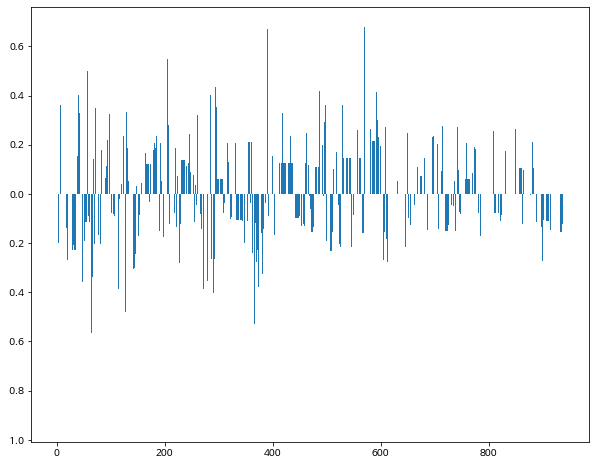

In [ ]:
plt.figure(figsize=(10, 8))
plt.bar(range(len(reg2.coef_[0])), reg2.coef_[0])

In [ ]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(reg2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(reg2.coef_[0])), reverse = False)
coef_pos_index

[(0.8262835872251066, 141),
 (0.770445993763209, 170),
 (0.7387020296205563, 112),
 (0.660148114048406, 260),
 (0.5759415594026785, 171),
 (0.4882391212763367, 194),
 (0.48291676079548734, 187),
 (0.4793716237483447, 56),
 (0.4597878986906657, 189),
 (0.4419215166497152, 652),
 (0.4356069927595314, 317),
 (0.4319049096904435, 748),
 (0.4240226262038657, 153),
 (0.41859273480775994, 136),
 (0.4160749957962154, 35),
 (0.41303670553478905, 692),
 (0.41165982477545854, 85),
 (0.4065949081575919, 274),
 (0.4047917401042008, 331),
 (0.3980676475796383, 343),
 (0.39009877041814983, 167),
 (0.3734410083619236, 34),
 (0.36451534580469575, 37),
 (0.35252012523752, 73),
 (0.34258268060069696, 633),
 (0.34120748660893657, 352),
 (0.33938903198353426, 832),
 (0.3364165400181098, 199),
 (0.33586866613333416, 300),
 (0.33295053234701416, 152),
 (0.3286895337063944, 304),
 (0.3285647364371274, 525),
 (0.32370560334137477, 353),
 (0.3146456220033953, 89),
 (0.31270871176613774, 41),
 (0.312708711766137

In [ ]:
invert_index_vectorizer = id_to_word

긍정과 부정에 가장 가까운 키워드 상위 10개

긍정

In [ ]:
pos_top_word=[] 
pos_top_score=[]
for coef in coef_pos_index[:10]:
    print(invert_index_vectorizer[coef[1]], coef[0])
    pos_top_word.append(invert_index_vectorizer[coef[1]])
    pos_top_score.append(coef[0])

테마 0.6797726897231896
마음 0.6690811463554612
클릭 0.5642803910329592
선물 0.5497830522086944
사용 0.4986530173458841
그거 0.49589272043740257
음성 0.4897645492580996
키워드 0.4522499863663618
기종 0.45097185516314464
정신 0.44699392231723567


부정

In [ ]:
neg_top_word=[] 
neg_top_score=[]

for coef in coef_neg_index[:10]:
    print(invert_index_vectorizer[coef[1]], coef[0])
    neg_top_word.append(invert_index_vectorizer[coef[1]])
    neg_top_score.append(coef[0])

확인 -0.9275467308067568
인증 -0.7522472965600102
오류 -0.6637576748743979
삭제 -0.5653941393552956
기기 -0.5413998682664469
실행 -0.529893717632513
추천 -0.47923266648153445
광고 -0.463554038742938
이상 -0.46179084786246216
메세지 -0.44887850431463316


In [ ]:
pos_top_word.reverse()
pos_top_score.reverse()
top_word=neg_top_word+ pos_top_word
top_score = neg_top_score+ pos_top_score

긍정과 부정에 가까운 키워드 상위 10개 시각화

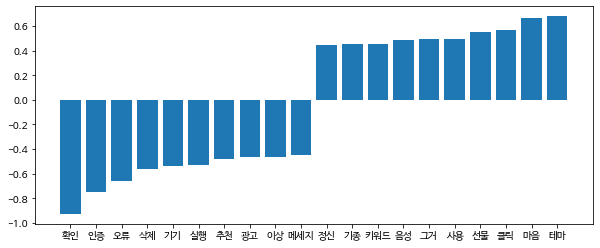

In [ ]:
plt.figure(figsize=(10, 4))
plt.rc('font', family = font)
plt.rcParams["axes.unicode_minus"] = False

plt.bar(neg_top_word, neg_top_score, label = "부정", color = 'r')
plt.bar(pos_top_word, pos_top_score, label = "긍정", color = 'b')

plt.bar(range(len(top_score)), top_score)
plt.xticks(range(len(top_word)), top_word)
plt.show()

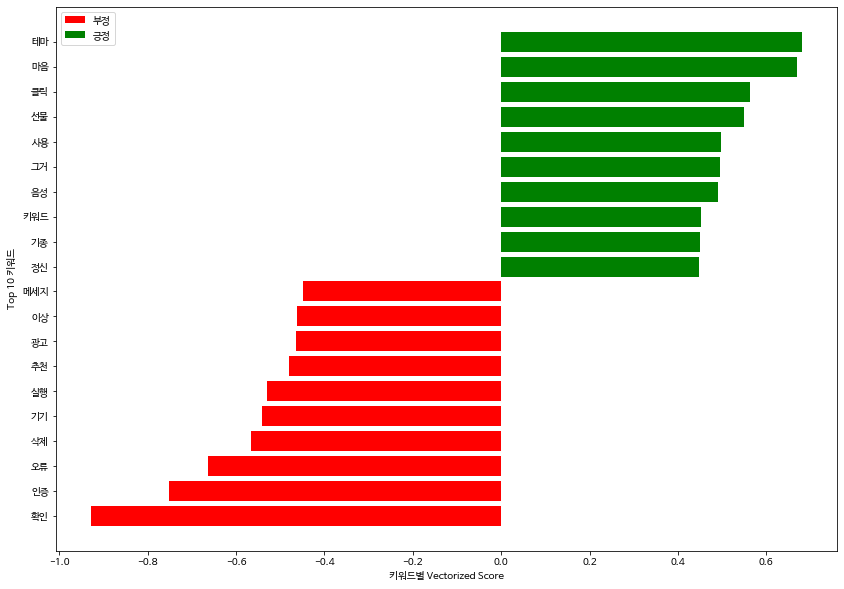

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[14, 10])
plt.barh(neg_top_word, neg_top_score, label = "부정", color = 'r')
plt.barh(pos_top_word, pos_top_score, label = "긍정", color = 'g')
plt.legend()
plt.xlabel('키워드별 Vectorized Score')
plt.ylabel('Top 10 키워드')

plt.show()